In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path = 'C:/Users/Dell/Downloads/AV JanataHack/Train_hMYJ020/'
dict_df = pd.read_csv(path + 'train_data_dict.csv')
dict_df

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [3]:
df_train = pd.read_csv(path + 'train.csv')
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [4]:
df_train.Stay = [ '11-20' if i == 'Nov-20' else i for i in df_train.Stay.values]
df_train.Stay = [ '101-200' if i == 'More than 100 Days' else i for i in df_train.Stay.values]
df_train.Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       '101-200', '81-90', '61-70', '91-100'], dtype=object)

In [5]:
#Finding the datatypes
df_train.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                      int64
Stay                                  object
dtype: object

In [6]:
print('Length of the training data / Number of rows = ', len(df_train))
print('Length of data/ Rows with unique patient id = ',len(df_train.patientid.unique()))
#Finding the null values
len(df_train[df_train.isnull().any(axis=1)])

Length of the training data / Number of rows =  318438
Length of data/ Rows with unique patient id =  92017


4645

In [7]:
df_train[df_train.isnull().any(axis=1)].head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
191,192,14,a,1,X,2,radiotherapy,Q,E,3.0,122110,NaN,Emergency,Minor,2,71-80,9096,51-60
192,193,30,c,3,Z,2,anesthesia,Q,A,4.0,122110,NaN,Trauma,Minor,2,71-80,5098,31-40
193,194,27,a,7,Y,2,radiotherapy,P,C,3.0,122110,NaN,Trauma,Minor,2,71-80,7776,21-30
194,195,27,a,7,Y,2,anesthesia,Q,C,3.0,122110,NaN,Trauma,Minor,2,71-80,5988,11-20
195,196,25,e,1,X,3,radiotherapy,S,E,3.0,122110,NaN,Urgent,Minor,2,71-80,5333,21-30


In [8]:
df_train['Stay_min'] = [int(i.split('-')[0]) for i in df_train.Stay.values]
df_train['Stay_max'] = [int(i.split('-')[1]) for i in df_train.Stay.values]
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Stay_min,Stay_max
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10,0,10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50,41,50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40,31,40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50,41,50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50,41,50


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DE683D080>,
      dtype=object)

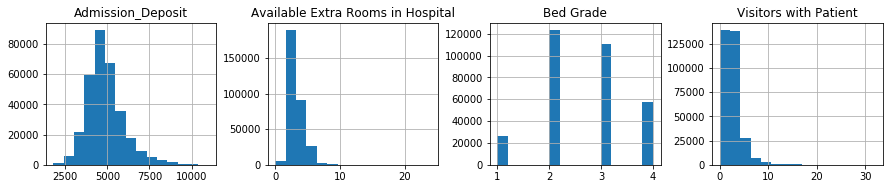

In [9]:
#Plotting histograms for the numerical variables/ features
numerical = [
  'Available Extra Rooms in Hospital' ,'Bed Grade' ,'Visitors with Patient' , 'Admission_Deposit'
]
df_train[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4))

Exploratory Data Analysis for Categorical Data Features / Columns

In [10]:
#selecting only the columns with data type as object
df_train.select_dtypes(include=['object']).columns

Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay'],
      dtype='object')

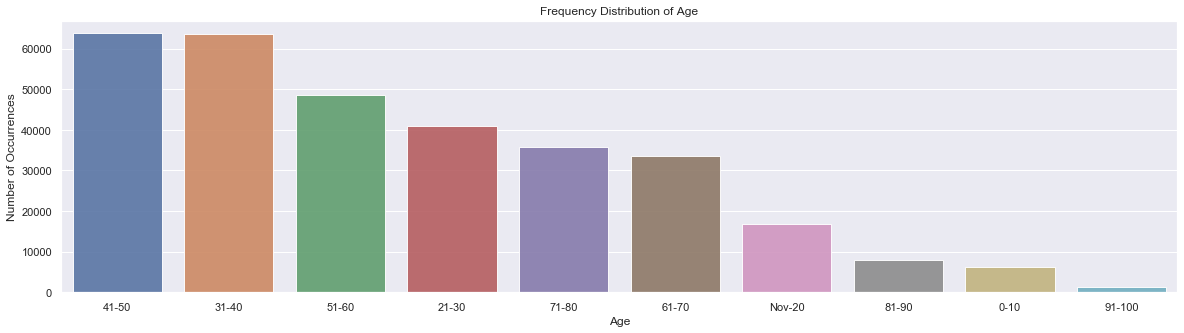

In [11]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.set(style="darkgrid")
sns.barplot(df_train['Age'].value_counts().index, df_train['Age'].value_counts().values, alpha=0.9)
plt.title('Frequency Distribution of Age')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

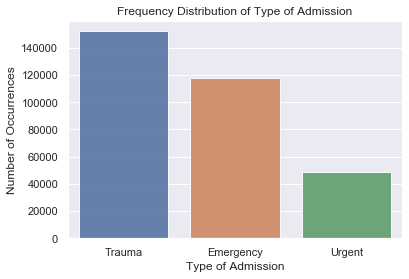

In [12]:
sns.set(style="darkgrid")
sns.barplot(df_train['Type of Admission'].value_counts().index, df_train['Type of Admission'].value_counts().values, alpha=0.9)
plt.title('Frequency Distribution of Type of Admission')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type of Admission', fontsize=12)
plt.show()

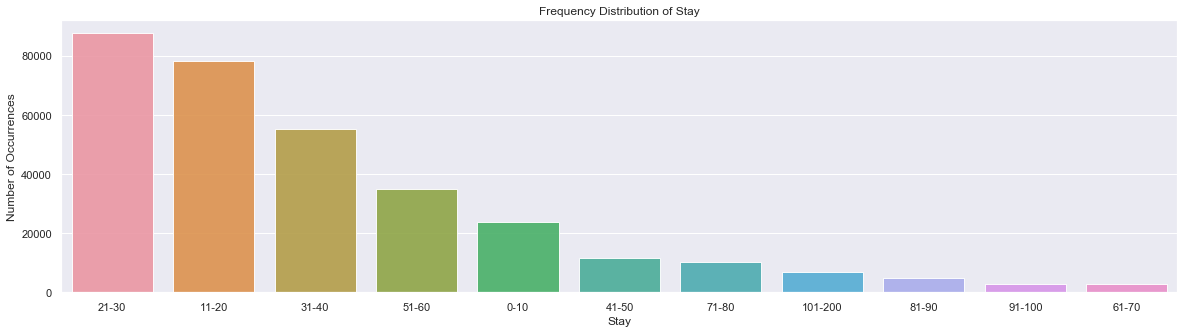

In [13]:
plt.figure(figsize=(20,5))
sns.set(style="darkgrid")
sns.barplot(df_train['Stay'].value_counts().index, df_train['Stay'].value_counts().values, alpha=0.9)
plt.title('Frequency Distribution of Stay')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Stay', fontsize=12)
plt.show()

### Plotting the mininum number of days of stay (count)

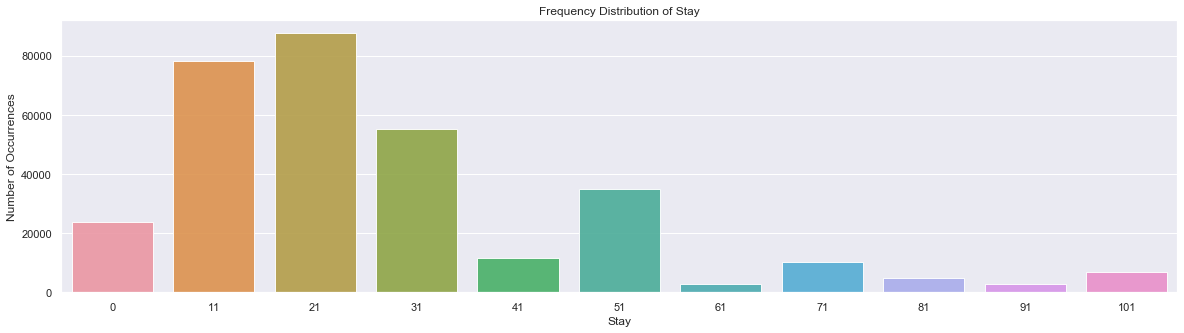

In [14]:
plt.figure(figsize=(20,5))
sns.set(style="darkgrid")
sns.barplot(df_train['Stay_min'].value_counts().index, df_train['Stay_min'].value_counts().values, alpha=0.9)
plt.title('Frequency Distribution of Stay')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Stay', fontsize=12)
plt.show()

### Plotting the maximum number of days of stay (count)

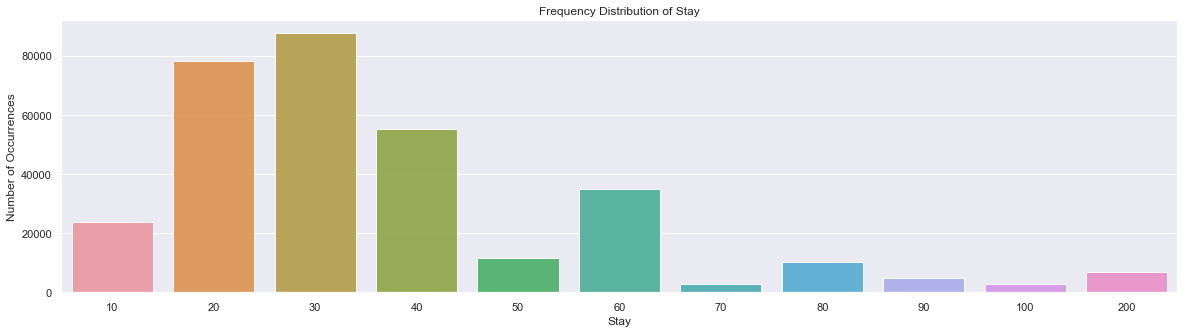

In [15]:
plt.figure(figsize=(20,5))
sns.set(style="darkgrid")
sns.barplot(df_train['Stay_max'].value_counts().index, df_train['Stay_max'].value_counts().values, alpha=0.9)
plt.title('Frequency Distribution of Stay')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Stay', fontsize=12)
plt.show()

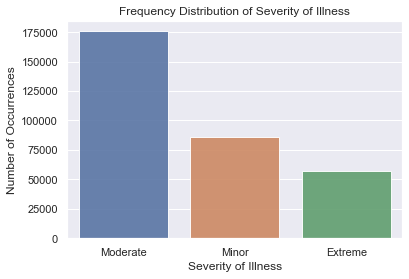

In [16]:
import seaborn as sns
sns.set(style="darkgrid")
sns.barplot(df_train['Severity of Illness'].value_counts().index, df_train['Severity of Illness'].value_counts().values, alpha=0.9)
plt.title('Frequency Distribution of Severity of Illness')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Severity of Illness', fontsize=12)
plt.show()

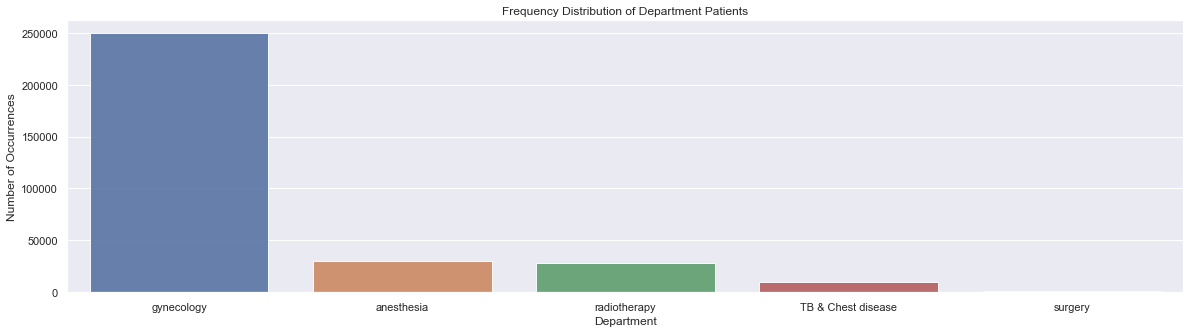

In [17]:
plt.figure(figsize=(20,5))
sns.set(style="darkgrid")
sns.barplot(df_train['Department'].value_counts().index, df_train['Department'].value_counts().values, alpha=0.9)
plt.title('Frequency Distribution of Department Patients')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.show()

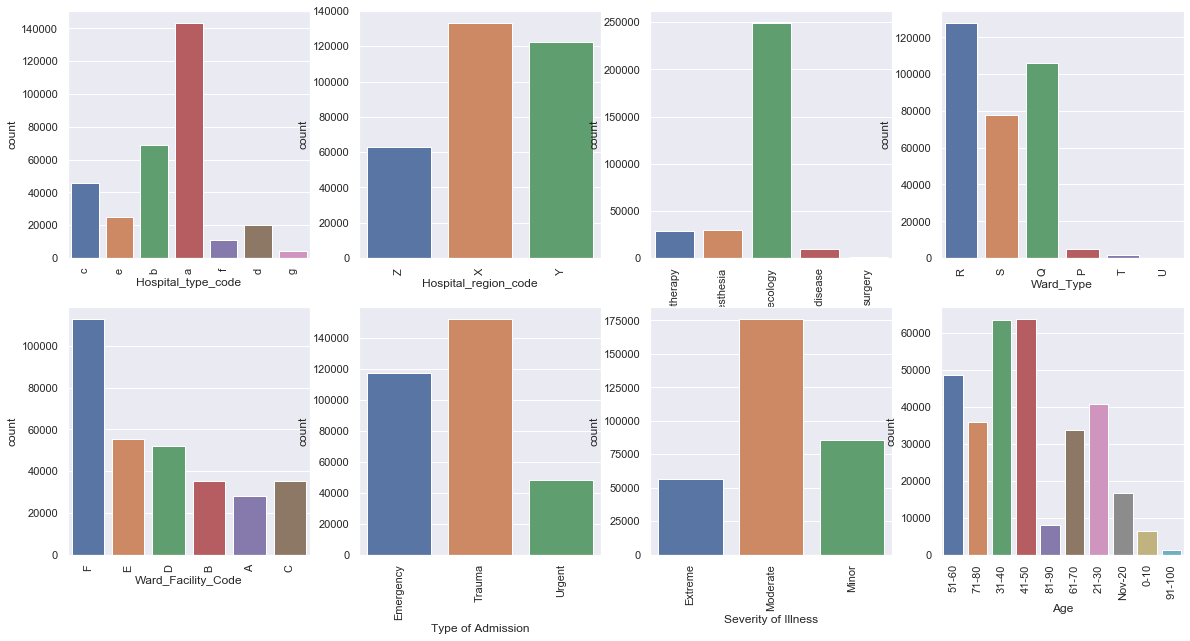

In [18]:
categorical = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay']
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

We have to encode the columns with the categorical data for easier processing.

In [19]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_train["Hospital_type_code"] = lb_make.fit_transform(df_train["Hospital_type_code"])
df_train["Hospital_region_code"] = lb_make.fit_transform(df_train["Hospital_region_code"])
df_train["Department"] = lb_make.fit_transform(df_train["Department"])
df_train["Ward_Type"] = lb_make.fit_transform(df_train["Ward_Type"])
df_train["Ward_Facility_Code"] = lb_make.fit_transform(df_train["Ward_Facility_Code"])
df_train["Type of Admission"] = lb_make.fit_transform(df_train["Type of Admission"])
df_train["Severity of Illness"] = lb_make.fit_transform(df_train["Severity of Illness"])
df_train["Age"] = lb_make.fit_transform(df_train["Age"])
df_train["Stay"] = lb_make.fit_transform(df_train["Stay"])

df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Stay_min,Stay_max
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,4,4911,0,0,10
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,4,5954,5,41,50
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,4,4745,4,31,40
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,4,7272,5,41,50
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,4,5558,5,41,50


In [20]:
df_train.City_Code_Patient.unique() #null values present

array([ 7.,  8.,  2.,  5.,  6.,  3.,  4.,  1.,  9., 14., nan, 25., 15.,
       12., 10., 28., 24., 23., 20., 11., 13., 21., 18., 16., 26., 27.,
       22., 19., 31., 34., 32., 30., 29., 37., 33., 35., 36., 38.])

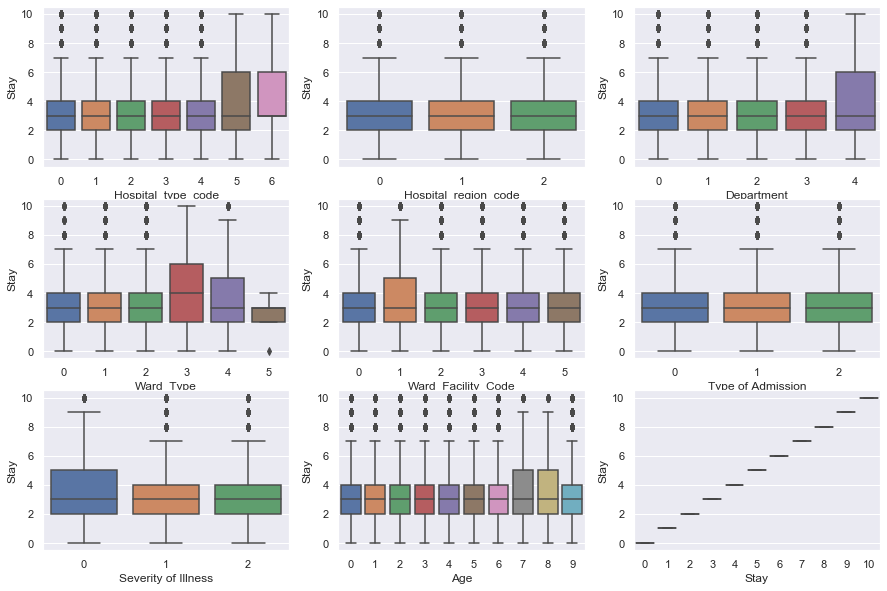

In [21]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='Stay', data=df_train, ax=subplot)

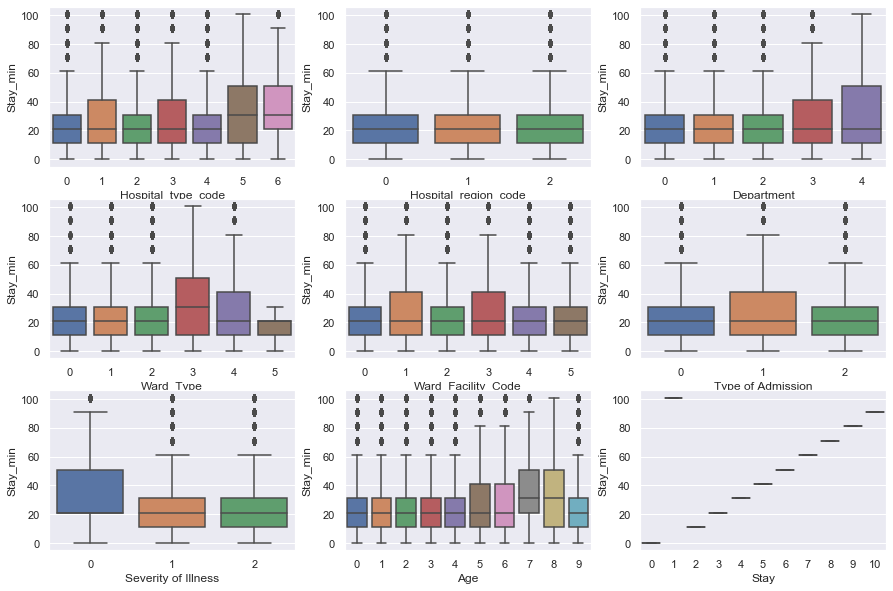

In [22]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='Stay_min', data=df_train, ax=subplot)

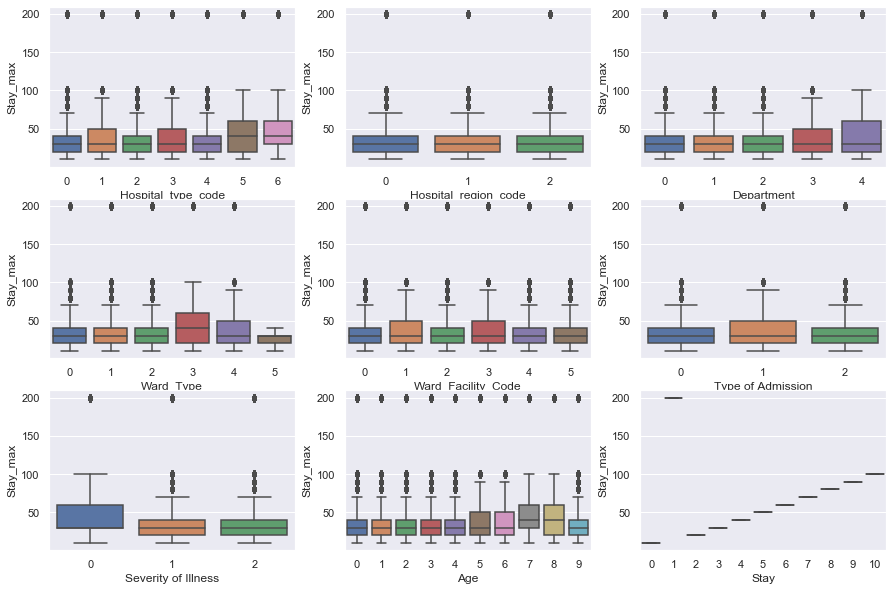

In [23]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='Stay_max', data=df_train, ax=subplot)

In [24]:
df_train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'Stay_min', 'Stay_max'],
      dtype='object')

In [25]:
df_train.columns[df_train.isna().any()].tolist() #don't include in training meanwhile

['Bed Grade', 'City_Code_Patient']

### Model Training

In [26]:
X = df_train[['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit']]
y = df_train[['Stay_min']].values
y = y.ravel()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X__ = pd.DataFrame(pca.transform(X_train))
X__.head()

,0,1
0,-1045.278875,-1.184586
1,-1670.279718,-1.388111
2,-621.276114,-7.730855
3,-860.278821,1.984054
4,-713.276231,-7.796138


In [34]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors= len(set(y)))
clf.fit(pd.DataFrame(pca.transform(X_train)),y_train)
#Predict the response for test dataset
y_pred = clf.predict(pd.DataFrame(pca.transform(X_train)))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print( )

y_pred = clf.predict(pd.DataFrame(pca.transform(X_test)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.38653759190714654

Accuracy: 0.26156261776158773


In [35]:
test_path = 'C:/Users/Dell/Downloads/AV JanataHack/Test_ND2Q3bm/'
test = pd.read_csv(test_path+'test.csv')
t_ = test[['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit']]
y_pred = clf.predict(pd.DataFrame(pca.transform(t_)))

ValueError: could not convert string to float: 'c'

In [32]:
# training a Decision Tree model
#from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier(random_state=0, max_depth = 10,class_weight='balanced')
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', alpha=0.005,hidden_layer_sizes=(50,50,50,), random_state=1,
                    max_iter=150, activation = 'relu')

clf.fit(X_train,y_train)

###################################################################################################
#Predict the response for test dataset
y_pred = clf.predict(X_train)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print( )

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

###################################################################################################


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.2749049525181302

Accuracy: 0.2742871498555458
